# Предизвикателство: Анализ на текст за наука за данни

В този пример ще направим просто упражнение, което обхваща всички стъпки на традиционния процес в науката за данни. Не е необходимо да пишете код, просто можете да кликнете върху клетките по-долу, за да ги изпълните и да наблюдавате резултата. Като предизвикателство, се насърчавате да изпробвате този код с различни данни.

## Цел

В този урок обсъждахме различни концепции, свързани с науката за данни. Нека се опитаме да открием още свързани концепции, като направим **текстов анализ**. Ще започнем с текст за науката за данни, ще извлечем ключови думи от него и след това ще се опитаме да визуализираме резултата.

Като текст ще използвам страницата за науката за данни от Wikipedia:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## Стъпка 1: Получаване на данните

Първата стъпка във всеки процес на анализ на данни е получаването на данните. Ще използваме библиотеката `requests`, за да направим това:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## Стъпка 2: Преобразуване на данните

Следващата стъпка е да преобразуваме данните във форма, подходяща за обработка. В нашия случай сме изтеглили HTML изходния код от страницата и трябва да го преобразуваме в обикновен текст.

Има много начини, по които това може да се направи. Ще използваме най-простия вграден обект [HTMLParser](https://docs.python.org/3/library/html.parser.html) от Python. Трябва да наследим класа `HTMLParser` и да дефинираме код, който ще събира целия текст вътре в HTML таговете, с изключение на таговете `<script>` и `<style>`.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## Стъпка 3: Получаване на прозрения

Най-важната стъпка е да преобразуваме данните си в някаква форма, от която можем да извлечем прозрения. В нашия случай искаме да извлечем ключови думи от текста и да видим кои ключови думи са по-съществени.

Ще използваме библиотеката на Python, наречена [RAKE](https://github.com/aneesha/RAKE), за извличане на ключови думи. Първо, нека инсталираме тази библиотека, ако все още не е налична:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Основната функционалност е достъпна от обекта `Rake`, който можем да персонализираме с помощта на някои параметри. В нашия случай ще зададем минималната дължина на ключова дума на 5 символа, минималната честота на ключова дума в документа на 3 и максималния брой думи в ключова дума - на 2. Чувствайте се свободни да експериментирате с други стойности и да наблюдавате резултата.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

Получихме списък с термини заедно със съответната степен на важност. Както можете да видите, най-значимите дисциплини, като машинно обучение и големи данни, са представени в списъка на водещи позиции.

## Стъпка 4: Визуализиране на резултата

Хората разбират данните най-добре, когато са представени визуално. Затова често има смисъл да се визуализират данните, за да се извлекат определени прозрения. Можем да използваме библиотеката `matplotlib` в Python, за да начертаем проста дистрибуция на ключовите думи с тяхната релевантност:


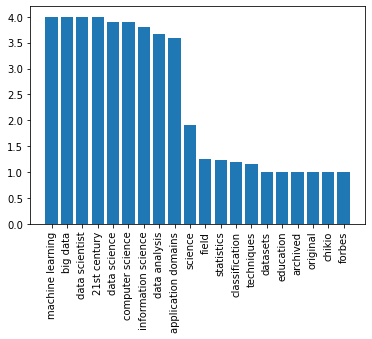

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

Има обаче още по-добър начин за визуализиране на честотата на думите - използвайки **Word Cloud**. Ще трябва да инсталираме друга библиотека, за да създадем облак от думи от нашия списък с ключови думи.


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud` обектът е отговорен за приемането на оригинален текст или предварително изчислен списък от думи с техните честоти и връща изображение, което след това може да бъде показано с помощта на `matplotlib`:


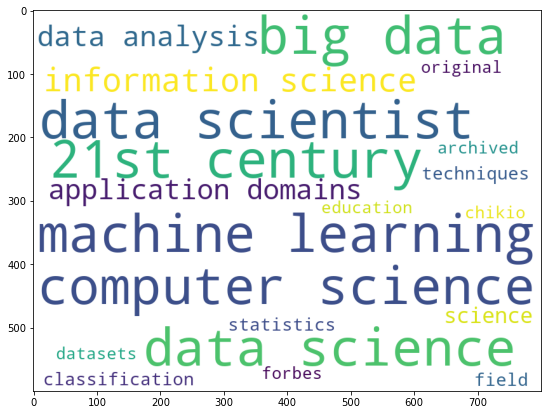

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

Можем също да предадем оригиналния текст на `WordCloud` - нека видим дали можем да получим подобен резултат:


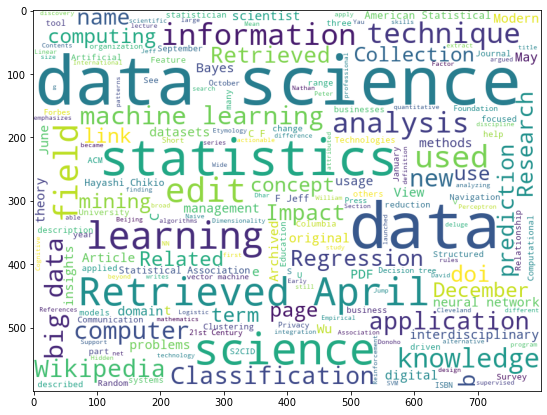

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Можете да видите, че облакът от думи сега изглежда по-впечатляващ, но също така съдържа много шум (например несвързани думи като `Retrieved on`). Освен това получаваме по-малко ключови думи, състоящи се от две думи, като *data scientist* или *computer science*. Това е така, защото алгоритъмът RAKE се справя много по-добре с избора на подходящи ключови думи от текста. Този пример илюстрира важността на предварителната обработка и почистването на данни, тъй като ясната картина в края ще ни позволи да вземаме по-добри решения.

В това упражнение преминахме през прост процес на извличане на смисъл от текст в Wikipedia, под формата на ключови думи и облак от думи. Този пример е доста прост, но добре демонстрира всички типични стъпки, които един специалист по данни предприема при работа с данни, започвайки от придобиването на данни до визуализацията.

В нашия курс ще обсъдим всички тези стъпки подробно.



---

**Отказ от отговорност**:  
Този документ е преведен с помощта на AI услуга за превод [Co-op Translator](https://github.com/Azure/co-op-translator). Въпреки че се стремим към точност, моля, имайте предвид, че автоматизираните преводи може да съдържат грешки или неточности. Оригиналният документ на неговия роден език трябва да се счита за авторитетен източник. За критична информация се препоръчва професионален човешки превод. Ние не носим отговорност за каквито и да е недоразумения или погрешни интерпретации, произтичащи от използването на този превод.
